### Neural Network

In [394]:
#imports
import numpy as np
import matplotlib.pyplot as plt

### Activation functions and derivatives

In [395]:
# Used activation functions
def sigmoid(x):
    return 1/(1+np.exp(-x))
def derivative_sigmoid(x):
    return np.multiply(sigmoid(x),(1-sigmoid(x)))

def softmax(x):
    return np.exp(x)/np.mat((np.sum(np.exp(x),axis = 1))).T
def derivative_softmax(x):
    term1 = ((np.mat(np.sum(np.exp(x),axis = 1)).T - np.exp(x))/np.exp(x))
    term2 = np.multiply(sigmoid(x),sigmoid(x))
    ret = np.multiply(term1,term2)
    temp = np.ones((np.shape(x)[0],np.shape(x)[1]))
    return ret

### One Hot encoding

In [396]:
# Conversion to one hot vector
def one_hot(y, out_shape):
    n = np.shape(y)[0]
    y_oht = np.zeros((n,out_shape))
    y_oht[np.arange(n), y] = 1
    return y_oht

### Implementing Network

In [397]:
# Neural Network
class Net:
    def __init__(self, n_features, size_l1, size_l2):
        #initialisation of network parameters
        self.output_size = 2
        self.layers = [size_l1,size_l2]
        self.size_l0 = n_features
        self.layer = {}
        self.layer['w1'] = np.random.random((self.size_l0,size_l1))
        self.layer['b1'] = np.random.random((1,size_l1))
        self.layer['w2'] = np.random.random((size_l1,size_l2))
        self.layer['b2'] = np.random.random((1,size_l2))
        self.layer['w_out'] = np.random.random((size_l2,2))
        self.layer['b_out'] = np.random.random((1,2))
        
    # Z-score noraalisation
    def normalize(self, x_train):
        x = (x_train - np.mat(np.mean(x_train,axis = 1)).T)/np.mat(np.std(x_train,axis = 1)).T
        return x
    
    # Forward pass
    def forward(self):
        self.z1 = np.dot(self.x, self.layer['w1']) + self.layer['b1']
        self.a1 = sigmoid(self.z1)
        
        self.z2 = np.dot(self.a1, self.layer['w2']) + self.layer['b2']
        self.a2 = sigmoid(self.z2)
    
        self.z_out = np.dot(self.a2, self.layer['w_out']) + self.layer['b_out']
        self.a_out = softmax(self.z_out)
        
        # Average loss(cost)
        l = np.mean(np.sum((np.multiply((self.y - self.a_out),(self.y - self.a_out))), axis = 1), axis = 0)
        return l[0][0]
    
    # Backpropagation
    def backward(self):
        
        delta3 = -2*(self.y - self.a_out)
        temp = np.multiply(delta3,derivative_softmax(self.z_out))
        dw3 = np.dot(self.a2.T, temp)/float(np.shape(self.x)[0])
        db3 = np.mean(temp, axis = 0)
        
        delta2 = np.dot(delta3, self.layer['w_out'].T)
        temp = np.multiply(delta2,derivative_sigmoid(self.z2))
        dw2 = np.dot(self.a1.T, temp)/float(np.shape(self.x)[0])
        db2 = np.mean(temp, axis = 0)
        
        delta1 = np.dot(delta2, self.layer['w2'].T)
        temp = np.multiply(delta1,derivative_sigmoid(self.z1))
        dw1 = np.dot(self.x.T, temp)/float(np.shape(self.x)[0])
        db1 = np.mean(temp,axis = 0)
        
        lr = self.learning_rate
        
        # Changing weights 
        self.layer['w_out'] -= lr*dw3
        self.layer['b_out'] -= lr*db3
        self.layer['w2'] -= lr*dw2
        self.layer['b2'] -= lr*db2
        self.layer['w1'] -= lr*dw1
        self.layer['b1'] -= lr*db1
    
    # Training function
    def train(self,x_train,y_train,learning_rate, epochs):
        self.x = x_train
        self.y = one_hot(y_train,self.output_size)
        self.learning_rate = learning_rate
        loss = []
        
        for e in range(epochs):
            l = self.forward()
            loss.append(l)
            self.backward()
        loss = np.reshape(loss,(-1))
        
        return loss
    
    #Prediction
    def predict(self):
        self.y_pred = np.argmax(self.a_out, axis = 1)
        self.y_pred = np.reshape(self.y_pred,(-1))
        return self.y_pred
        

### Importing Training Data

In [405]:
from sklearn.datasets import make_blobs, make_moons

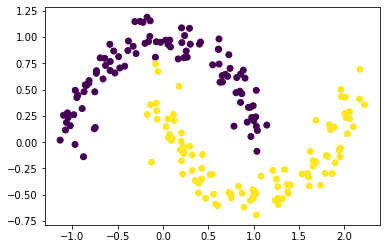

In [399]:
# Formulation of training data
X,Y = make_moons(n_samples = 200,noise = 0.1,random_state = 2)
plt.scatter(X[:,0],X[:,1],c = Y)

### Training Network

In [400]:
model = Net(2,10,5)

In [401]:
loss = model.train(X,Y,0.1,5000)
y_pred = model.predict()

In [402]:
print(y_pred)

[[0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0
  1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1
  1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0
  0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0
  1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0
  1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1]]


### Training Accuracy

In [406]:
print(np.sum(y_pred == Y)/np.shape(Y)[0])

0.88


### Plotting Cost Function

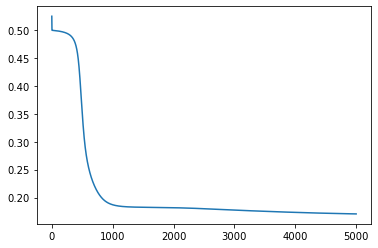

In [404]:
plt.plot(loss)